

# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I decided work on movies Dataset for data analysis. The dataset collected from The Movie Database (TMDb) it contains information about 10,866 movies, the number of columns are 21. 

## Questions:
<ul>
<li>What is the highest budget movie?</li>
<li>What is the lowest budget movie?</li>
<li>which movie had the highest profit?</li>
<li>which movie had the lowest profit?</li>
<li> Which movie get the highest votes?</li>
<li> Which movie get the lowest votes?</li>
<li> Which genre were more successful?</li>
</ul>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#important libraries 
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### Observation from the Dataset:

> I will be keep relevent data and delet unuse data to calculation easy and understandable. 
> A lots of movies contain 'zero value' on the budget and revenue. 


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
# Read the Data by Pandas read_csv function
df = pd.read_csv('/Users/nadaa/tmdb-movies.csv')   
#print first 5 rows 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# print the number of elements 
df.shape

(10866, 21)

In [4]:
# print summery of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# Check the data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Data Cleaning 

> Remove unused columns such as id, imdb_id, keywords, homepage, etc.

> Remove the movies which are having zero value of budget and revenue.

> Drop duplicates.

In [6]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### 1- Remove unused columns

<ul>
<li>imdb_id</li>
<li>homepage</li>
<li>budget_adj</li>
<li>revenue_adj</li>
<li>overview</li>
<li>keywords</li>
<li>production_companies</li>
</ul>

In [7]:
# remove
df.drop(['imdb_id','homepage','budget_adj','revenue_adj','overview','keywords','production_companies'],axis =1,inplace = True)
print("Number of columns after remove ", df.shape)

Number of columns after remove  (10866, 14)


### 2- Drop the rows which contain '0' value
> I will remove '0' from budget and revenue because when calculate the profits of these movies would lead to unsuitable results.

reference: https://www.xspdf.com/resolution/53014515.html

In [8]:
df = df.loc[~((df['budget']==0))]

In [9]:
df = df.loc[~((df['revenue']==0))]

In [10]:
df.shape

(3855, 14)

In [11]:
df.head(33)

,id,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015


In [12]:
df.shape

(3855, 14)

### 3- Drop duplicates

In [13]:
sum(df.duplicated())

1

In [14]:
# drop duplicates
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118d87d00>,
      dtype=object)

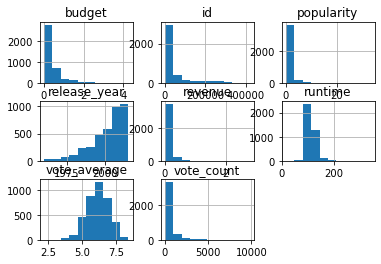

In [15]:
# 1-D visualizations like histograms
# Reference: https://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/
df.hist()

<a id='eda'></a>
## Exploratory Data Analysis

> Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. 
### Research Question 1: What is the highest budget movie?

In [16]:
# use idmax function to find highest budget
# function returns index of first occurrence of maximum over requested axis
#reference: https://www.geeksforgeeks.org/python-pandas-dataframe-idxmax/
df.loc[df['budget'].idxmax()]

id                                                            46528
popularity                                                  0.25054
budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
tagline                                     Assassin. Hero. Legend.
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                                12/2/10
vote_count                                                       74
vote_average                                                    6.4
release_year                                                   2010
Name: 2244, dtype: object

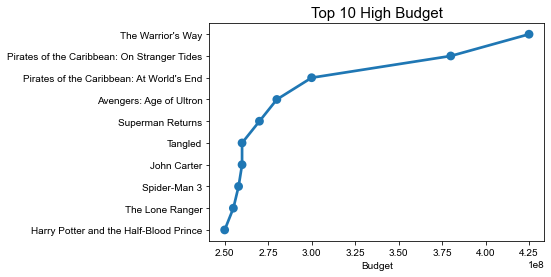

In [17]:
#chart the top 10 highest budget
# first step: sort the column in descending 
sort=df.sort_values(by='budget', ascending=False)
sort['original_title'] = df['original_title']
data = list(map(str,(sort['original_title'])))
#select the top 10 highest budget
x = list(data[:10])
y = list(sort['budget'][:10])
#title and labels
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(9,4)})
ax.set_title("Top 10 High Budget",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 10)
sns.set_style("whitegrid")

> The Warrior's Way with budget of 425000000 

### Research Question 2: What is the lowest budget movie?

In [18]:
# use idmax function to find lowest budget
# function returns index of first occurrence of minimum over requested axis
#reference: https://www.geeksforgeeks.org/python-pandas-dataframe-idxmin/
df.loc[df['budget'].idxmin()]

id                                                            39964
popularity                                                 0.090186
budget                                                            1
revenue                                                         100
original_title                                         Lost & Found
cast              David Spade|Sophie Marceau|Ever Carradine|Step...
director                                               Jeff Pollack
tagline           A comedy about a guy who would do anything to ...
runtime                                                          95
genres                                               Comedy|Romance
release_date                                                4/23/99
vote_count                                                       14
vote_average                                                    4.8
release_year                                                   1999
Name: 2618, dtype: object

> Lost & Found with budget of 1 

### Research Question 3: which movie had the highest profit?

In [19]:
#Insert new column (Profit) then calculate Profit for each of the movie
#To calculate profit use this equation (profit = revenue - budget)
df['Profit'] = df['revenue'] - df['budget']

In [20]:
# use idmax function to find highest profit
# function returns index of first occurrence of maximum over requested axis
#reference: https://www.geeksforgeeks.org/python-pandas-dataframe-idxmax/
maxindex = df['Profit'].idxmax()
maxmov=df['original_title'][maxindex]
print("The highest profit movie is: "+ maxmov)
print('__________________________________________________________________')
highest = pd.DataFrame(df.loc[maxindex,:])
print("The details of " + maxmov + " movie:")
print(highest)

The highest profit movie is: Avatar
__________________________________________________________________
The details of Avatar movie:
                                                             1386
id                                                          19995
popularity                                                9.43277
budget                                                  237000000
revenue                                                2781505847
original_title                                             Avatar
cast            Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                            James Cameron
tagline                               Enter the World of Pandora.
runtime                                                       162
genres                   Action|Adventure|Fantasy|Science Fiction
release_date                                             12/10/09
vote_count                                                   8458
vote_avera

> Avatar made a profit of 2544505847

### Research Question 4: which movie had the lowest profit?

In [21]:
# use idmax function to find lowest profit
# function returns index of first occurrence of minimum over requested axis
minindex = df['Profit'].idxmin()
minmov=df['original_title'][minindex]
print("The lowest profit movie is: "+ minmov)
print('__________________________________________________________________')
lowest = pd.DataFrame(df.loc[minindex,:])
print("The details of " + minmov + " movie:")
print(lowest)

The lowest profit movie is: The Warrior's Way
__________________________________________________________________
The details of The Warrior's Way movie:
                                                             2244
id                                                          46528
popularity                                                0.25054
budget                                                  425000000
revenue                                                  11087569
original_title                                  The Warrior's Way
cast            Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                               Sngmoo Lee
tagline                                   Assassin. Hero. Legend.
runtime                                                       100
genres                  Adventure|Fantasy|Action|Western|Thriller
release_date                                              12/2/10
vote_count                                             

> The Warrior's Way with profit of -413912431

### Research Question 5: Which movie get the highest vote?

In [22]:
# use idmax function to find highest vote
df.loc[df['vote_average'].idxmax()]

id                                                              278
popularity                                                  7.19204
budget                                                     25000000
revenue                                                    28341469
original_title                             The Shawshank Redemption
cast              Tim Robbins|Morgan Freeman|Bob Gunton|William ...
director                                             Frank Darabont
tagline           Fear can hold you prisoner. Hope can set you f...
runtime                                                         142
genres                                                  Drama|Crime
release_date                                                9/10/94
vote_count                                                     5754
vote_average                                                    8.4
release_year                                                   1994
Profit                                          

> The Shawshank Redemption with 8.4 vote

### Research Question 6: Which movie get the lowest vote?

In [23]:
# use idmax function to find lowest vote
df.loc[df['vote_average'].idxmin()]

id                                                           116977
popularity                                                 0.111351
budget                                                     65000000
revenue                                                       73706
original_title                                           Foodfight!
cast              Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...
director                                          Lawrence Kasanoff
tagline                                 When good food... goes bad!
runtime                                                          87
genres                               Animation|Action|Comedy|Family
release_date                                                6/15/12
vote_count                                                       12
vote_average                                                    2.2
release_year                                                   2012
Profit                                          

> Foodfight! with 2.2 vote

### Research Question 7: Which genre were more successful?

In [24]:
#first step:separate '|'
spli_genres = df['genres'].str.cat(sep = '|')
spli_genres = pd.Series(spli_genres.split('|'))
#descending 
c_genres = spli_genres.value_counts(ascending = False)
c_genres.head()

Drama        1756
Comedy       1358
Thriller     1204
Action       1085
Adventure     749
dtype: int64

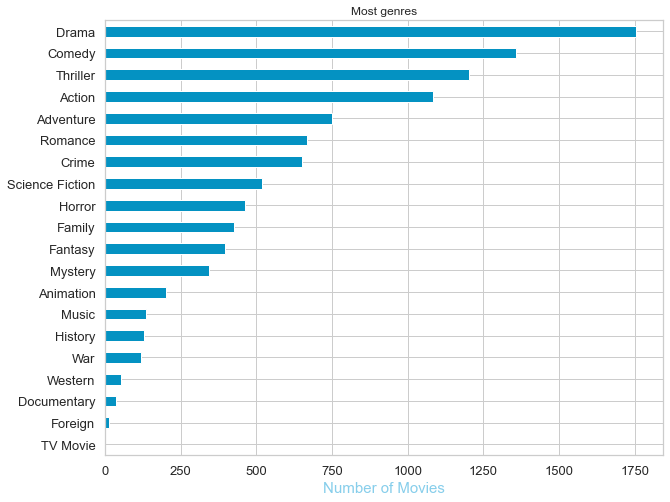

In [25]:
# first step: sort the column in descending 
c_genres.sort_values(ascending = True, inplace = True)
x = c_genres.plot.barh(color = '#0492C2', fontsize = 13)
#title
x.set(title = 'Most genres')
x.set_xlabel('Number of Movies', color = 'skyblue', fontsize = '15')
x.figure.set_size_inches(10, 8)
plt.show()

<a id='conclusions'></a>
## Conclusions

#### In conclusion, The Top 5 budget:
<ul>
<li>the warrior's way</li>
<li>pirates of the caribbean on stranger tides</li>
<li>pirates of the caribbean at world's end</li>
<li>avengers age of ultron</li>
<li> superman returns</li>

    
#### If i want to watch a movie, I focus on this top 10 Genres to find best movies, because these genres had more successful:
    
<ul>
<li>Drama</li>
<li>Comedy</li>
<li>Thriller</li>
<li>Action</li>
<li>Adventure</li>
<li>Romance</li>
<li>Crime</li>
<li>Scince Fiction</li>
<li>Horror</li>
<li>Family</li>

 I deduced from the result **The Shawshank Redemption** has highest vote and **Foodfight!** lowest vote.

 **Avatar** has the highest profit and **The Warrior's Way** has The lowest profit. 
    
 **Limitations:** There is a lot of missing data in the dataset.


# References

https://www.xspdf.com/resolution/53014515.html
https://www.geeksforgeeks.org/python-pandas-dataframe-idxmax/
https://www.kaggle.com/deepak525/investigate-tmdb-movie-dataset
https://github.com/JuzerShakir/Investigate_TMDb_Movies/blob/master/report.ipynb
https://www.geeksforgeeks.org/python-pandas-dataframe-idxmain/
https://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/